In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ds = pd.read_csv(r"C:\Users\mouav\OneDrive\Desktop\PPP1\Expanded_data_with_more_features.csv")

In [16]:
print(ds.head(3))

   Unnamed: 0  Gender EthnicGroup         ParentEduc LunchType TestPrep  \
0           0  female         NaN  bachelor's degree  standard     none   
1           1  female     group C       some college  standard      NaN   
2           2  female     group B    master's degree  standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  


In [12]:
ds.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [65]:
ds.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
# As you can see many null values but we don't have need to fill because
# We have to work ony with MathScore ,ReadingScore ,WritingScore
# So there is no null value present in those columns

In [ ]:
# Transformation of '05-Oct' to '5-10'
# Because it's not making sense (05-Oct)

In [17]:
ds['WklyStudyHours'] = ds['WklyStudyHours'].str.replace('05-Oct','5-10')
ds.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

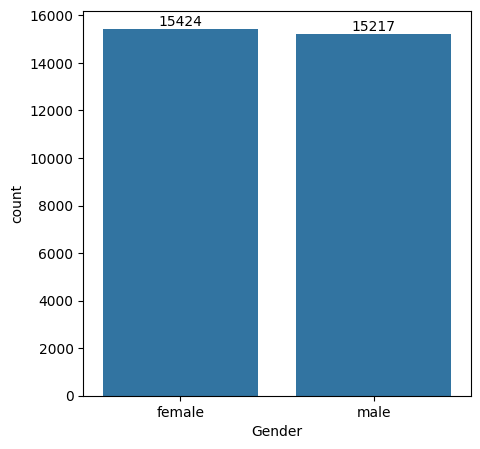

In [28]:
plt.figure(figsize = (5,5))
ax=sns.countplot(data = ds, x ='Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [29]:
#From the above chart we can analysed that 
#Number of Females in the data is more than number of males

gb = ds.groupby('ParentEduc').agg({'MathScore': 'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

#Graphical Representation of Above data

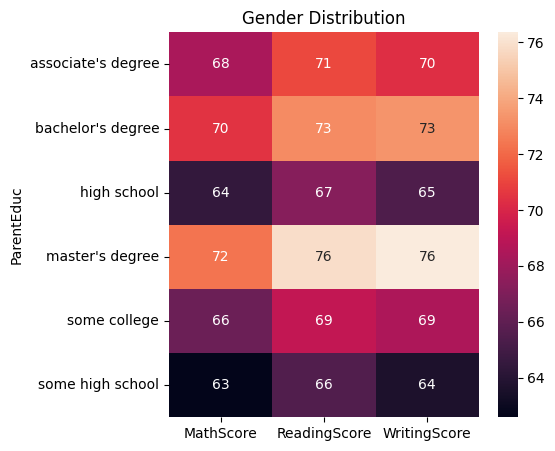

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot = True)
plt.title('Gender Distribution')
plt.show()

In [36]:
# From the above chart we have concluded that 
#Education of the parent have a good impact

In [37]:
gb1 = ds.groupby('ParentMaritalStatus').agg({'MathScore': 'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


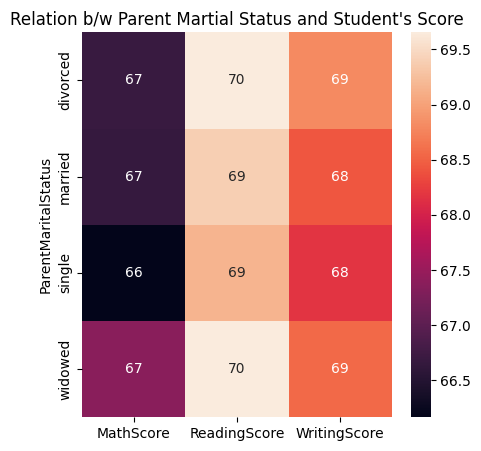

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot = True)
plt.title("Relation b/w Parent Martial Status and Student's Score")
plt.show()

In [46]:
# From the above chart we concluded that there is no imapct
# On the student scores due to parent Martial status

In [48]:
gb2 = ds.groupby('PracticeSport').agg({'MathScore': 'mean','ReadingScore':'mean','WritingScore':'mean'})
gb2

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


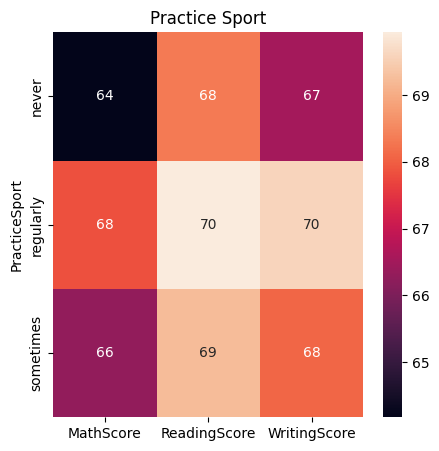

In [49]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot = True)
plt.title("Practice Sport")
plt.show()

# Now we are making boxplot to check Outliers in data

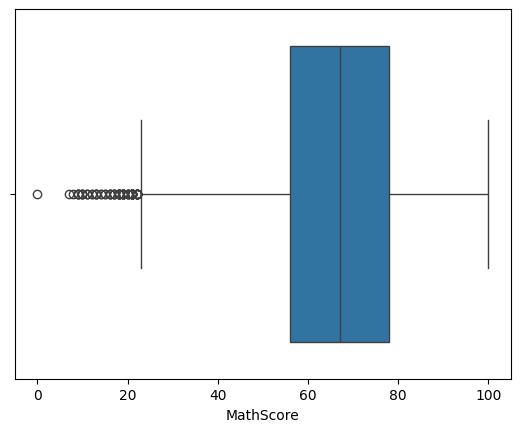

In [47]:
sns.boxplot(data = ds, x = 'MathScore')
plt.show()

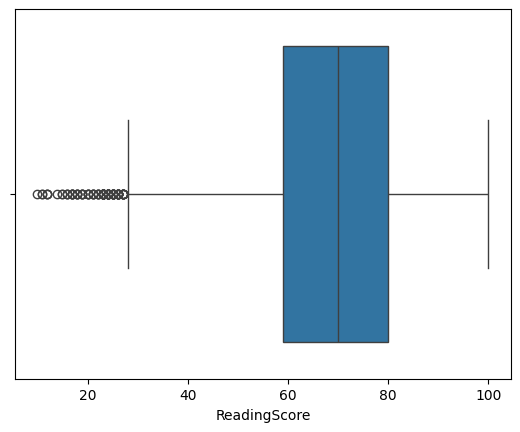

In [50]:
sns.boxplot(data = ds, x = 'ReadingScore')
plt.show()

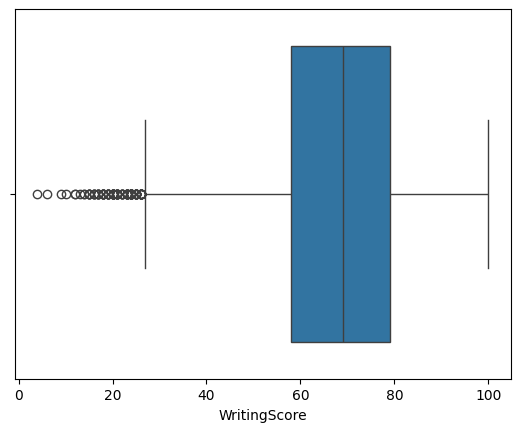

In [64]:
sns.boxplot(data = ds, x = 'WritingScore')
plt.show()

In [51]:
print(ds['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

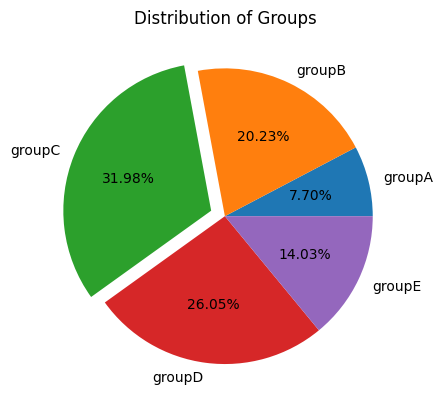

In [66]:
groupA = ds.loc[(ds['EthnicGroup'] == 'group A')].count()
groupB = ds.loc[(ds['EthnicGroup'] == 'group B')].count()
groupC = ds.loc[(ds['EthnicGroup'] == 'group C')].count()
groupD = ds.loc[(ds['EthnicGroup'] == 'group D')].count()
groupE = ds.loc[(ds['EthnicGroup'] == 'group E')].count()
l = ['groupA','groupB','groupC','groupD','groupE']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]

myexplode =[0,0,0.1,0,0]
plt.pie(mlist,labels = l, autopct = '%1.2f%%',explode = myexplode)
plt.title('Distribution of Groups')

plt.show()

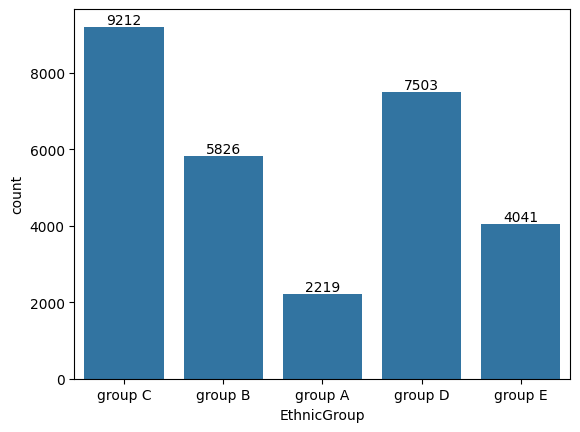

In [63]:
ax = sns.countplot(data = ds, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# As you can see the distribution of graph in groups